In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from google.colab import files

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.legend_handler import HandlerLine2D


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.legend_handler import HandlerLine2D

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
#from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import numpy as np

In [0]:
def setData():
  !mkdir data/

  !wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=14mFpHsZMdnmADks0kzEQIYHEhmSLS2LT' -O data/train.zip
  #!wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1U0UE6gjmspQkVea8xOm3CT-wKsbBAwzF' -O data/addsucc.zip
  #!wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=15rYkZ-tH4owzg-1yb2Ie1de3lQomhQ5X' -O data/addon_desk.zip
  !wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1IpaIM1K0cdeQTk_m_lLirjbVGZJTHRVA' -O data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

  !mkdir data/train
  !unzip data/train.zip -d data/
  #!unzip data/addsucc.zip -d data/train/train/succ/
  #!unzip data/addon_desk.zip -d data/train/train/zon_desk/

Architectures


In [0]:
def model_alex():
  import keras
  #from keras.callbacks import ModelCheckpoint
  #from keras import backend as K
  from keras.models import Sequential
  from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
  from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
  #from keras.utils import to_categorical
  #from keras.preprocessing.image import ImageDataGenerator
  
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

  # Max Pooling
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

  # 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

  # Max Pooling
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

  # 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

  # 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

  # 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

  # Max Pooling
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

  # Passing it to a Fully Connected layer
  model.add(Flatten())
  # 1st Fully Connected Layer
  model.add(Dense(units = 9216, activation = "relu"))

  # 2nd Fully Connected Layer
  model.add(Dense(units = 4096, activation = "relu"))

  # 3rd Fully Connected Layer
  model.add(Dense(4096, activation = "relu"))

  # Output Layer
  model.add(Dense(2, activation = "softmax")) #As we have two classes
  
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              #optimizer=Adam(lr=0.0001),
              metrics=['acc'])
  
  return model

In [0]:
def model_alex_fullyconnected():
  import keras
  #from keras.callbacks import ModelCheckpoint
  #from keras import backend as K
  from keras.models import Sequential
  from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
  from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
  #from keras.utils import to_categorical
  #from keras.preprocessing.image import ImageDataGenerator
  
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

  # Max Pooling
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

  # 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

  # Max Pooling
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

  # 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

  # 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

  # 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

  # Max Pooling
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

  # Passing it to a Fully Connected layer
  model.add(Flatten())
  # 1st Fully Connected Layer
  model.add(Dense(units = 1024, activation = "relu"))

  model.add(Dropout(0.2))

  # 2nd Fully Connected Layer
  #model.add(Dense(units = 4096, activation = "relu"))

  # 3rd Fully Connected Layer
  #model.add(Dense(4096, activation = "relu"))

  # Output Layer
  model.add(Dense(1, activation = "sigmoid")) #As we have two classes
  
  model.compile(loss='binary_crossentropy',
              #optimizer=RMSprop(lr=0.0001),
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])
  
  return model

In [0]:
def model_vgg16(pixel):
  pre=keras.applications.VGG16(include_top=False,input_shape=(pixel,pixel,3))
  last_layer= pre.get_layer('block5_pool')
  last_output=last_layer.output
  return last_output, pre

In [0]:
def model_vgg16_w(pixel):
  pre=keras.applications.VGG16(include_top=False,input_shape=(pixel,pixel,3), weights='imagenet')
  for layer in pre.layers:
    layer.trainable=False
  last_layer= pre.get_layer('block5_pool')
  last_output=last_layer.output
  return last_output, pre

In [0]:
def model_inceptionV3(pixel):
  pre=keras.applications.inception_v3.InceptionV3(input_shape=(pixel,pixel,3), include_top=False, weights=None)
  last_layer = pre.get_layer('mixed7')
  #print('last layer output shape:', last_layer.output_shape)
  last_output = last_layer.output

  return last_output, pre

In [0]:
def model_inceptionV3_w(pixel):
  pre=keras.applications.inception_v3.InceptionV3(input_shape=(pixel,pixel,3), include_top=False, weights='imagenet')
  for layer in pre.layers:
    layer.trainable=False
  last_layer = pre.get_layer('mixed7')
  #print('last layer output shape:', last_layer.output_shape)
  last_output = last_layer.output

  return last_output, pre

In [0]:
def model_inception_res_v2(pixel):
  pre=keras.applications.InceptionResNetV2(include_top=False, input_shape=(pixel,pixel,3), weights='imagenet')
  for layer in pre.layers:
    layer.trainable=False
  last_layer= pre.get_layer('mixed_7a')
  last_output=last_layer.output
  return last_output, pre

In [0]:
def inres2(pixel):
  pre=keras.applications.InceptionResNetV2(include_top=False, input_shape=(pixel,pixel,3), weights='imagenet')
  for layer in pre.layers:
    layer.trainable=False
  last_layer= pre.get_layer('mixed_7a')
  last_output=last_layer.output
  return last_output, pre

In [0]:
def configureLayers(last_output, pre, dropout_rate):
  x=layers.Flatten()(last_output)
  x=layers.Dense(1024,activation='relu')(x)
  x=layers.Dropout(dropout_rate)(x)
  x=layers.Dense(1, activation='sigmoid')(x)

  model=Model(pre.input,x)
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])
  return model


Create a model
- AlexNet doesn't need this

In [0]:
def create_model(mod, pixels, dropout_rate):
  last_output, pre_trained_model= mod(pixels)
  return configureLayers(last_output,pre_trained_model,dropout_rate)

In [0]:
def trainGraph(model, train_generator, valid_generator, epoch,cppath):
  cp_callback = keras.callbacks.ModelCheckpoint(cppath+"/weights.{epoch:02d}.ckpt",
                                          save_weights_only=True,
                                          #save_best_only=True,
                                          #period=5,
                                          verbose=1)
  
  history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epoch,
        validation_data=valid_generator,
        validation_steps=len(valid_generator),
        callbacks=[cp_callback],
        verbose=2)



# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

# Get number of epochs
  epochs = range(len(acc))

# Plot training and validation accuracy per epoch
  train1,=plt.plot(epochs, acc)
  valid1, =plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.legend([(train1),(valid1)],['train','valid'])


  plt.figure()

# Plot training and validation loss per epoch
  train2,=plt.plot(epochs, loss)
  valid2,=plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

  plt.legend([(train2),(valid2)],['train','valid'])

Image Processing

In [0]:
def generator(trainpath, validpath, pixels):
  train_dir = trainpath
  valid_dir=validpath

  train_datagens=[]

  val_datagen = ImageDataGenerator(rescale=1./255)
  train_datagens.append(val_datagen)

  # Add data-augmentation parameters to ImageDataGenerator
  train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

  
  train_generator=train_datagen.flow_from_directory(
      train_dir,
      target_size=(pixels,pixels),
      #color_mode='grayscale',
      batch_size=20,
      class_mode='binary')

  valid_generator = val_datagen.flow_from_directory(
        valid_dir,
        target_size=(pixels, pixels), 
        #color_mode='grayscale', 
        batch_size=20,
        class_mode='binary')
  
  return train_generator, valid_generator

In [49]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
setData()

In [0]:
model=create_model(model_vgg16, 224,0.2)

In [44]:
train_generator, valid_generator=generator('data/train/train/','data/train/valid',227)

Found 1645 images belonging to 2 classes.
Found 469 images belonging to 2 classes.


In [0]:
!mkdir cp

In [0]:
trainGraph(model,train_generator, valid_generator,50,'cp')

Test

In [0]:
def testset():
  !wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=13_nYOtVE9d61VjCKR_fl1q1hS4imOytL' -O data/testsucc.zip
  !wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1SShxrPhw9gQxvs5Ueoh1MiE8PSzl4BjG' -O data/testdesk.zip

  !mkdir test
  !mkdir test/test0
  !mkdir test/test1
  #!mkdir test/test1
  #!mkdir test/test2
  !unzip data/testsucc.zip -d test/test0
  !unzip data/testdesk.zip -d test/test1

In [0]:
testset()

In [161]:
pixels=350
train1_datagen = ImageDataGenerator(
    rescale=1./255)


test_generator=train1_datagen.flow_from_directory(
      'test/test0',
      target_size=(pixels,pixels),
      batch_size=1)
      #color_mode='grayscale',
      #class_mode='binary')

test_generator2=train1_datagen.flow_from_directory(
      'test/test1',
      target_size=(pixels,pixels),
      batch_size=1)
      #color_mode='grayscale',
      #class_mode='binary')

Found 115 images belonging to 1 classes.
Found 121 images belonging to 1 classes.


In [0]:
model=create_model(model_inception_res_v2,350,0.3)

In [0]:
m2=model

In [160]:
m2.load_weights('drive/My Drive/cp/gray/inceptionResv2350/weights.49.ckpt')

In [0]:
predict_results=[]

In [163]:
count=0
for i in range(len(test_generator)):
  tmp=m2.predict(test_generator[i][0])
  predict_results.append(tmp[0][0])
  if tmp[0][0]<0.5:
    count+=1
print(count)
print(i+1)

106
115


In [164]:
count=0
for i in range(len(test_generator2)):
  tmp=m2.predict(test_generator2[i][0])
  predict_results.append(tmp[0][0])
  if tmp[0][0]>=0.5:
    count+=1
print(count)
print(i+1)

108
121


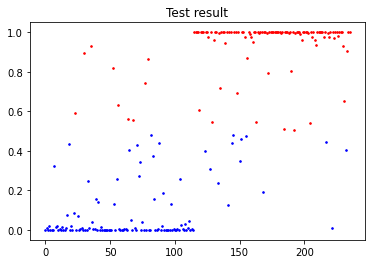

In [165]:
x=np.linspace(0,len(test_generator)+len(test_generator2)-1,len(test_generator)+len(test_generator2))
y= np.asarray(predict_results)
ne=np.ma.masked_where(y>=0.5,y)
po=np.ma.masked_where(y<0.5, y)
plt.title('Test result')
plt.plot(x,ne,'bo',x,po,'ro',markersize=1.6)